In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("vertebrate.csv")
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


In [4]:
data.drop(['Name'],axis=1,inplace=True)
data

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,1,1,0,0,1,0,mammals
1,0,0,0,0,0,1,reptiles
2,0,0,1,0,0,0,fishes
3,1,1,1,0,0,0,mammals
4,0,0,1,0,1,1,amphibians
5,0,0,0,0,1,0,reptiles
6,1,1,0,1,1,1,mammals
7,1,0,0,1,1,0,birds
8,1,1,0,0,1,0,mammals
9,0,1,1,0,0,0,fishes


In [5]:
data.isnull().sum()

Warm-blooded        0
Gives Birth         0
Aquatic Creature    0
Aerial Creature     0
Has Legs            0
Hibernates          0
Class               0
dtype: int64

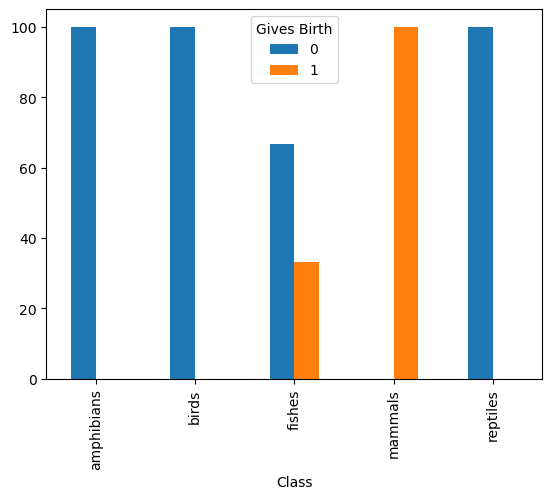

Percentage of class group by Given birth

Gives Birth           0           1
Class                              
amphibians   100.000000    0.000000
birds        100.000000    0.000000
fishes        66.666667   33.333333
mammals        0.000000  100.000000
reptiles     100.000000    0.000000


In [6]:
tab=pd.crosstab(data["Class"],data["Gives Birth"],normalize='index')*100  #showing the relationship between two variables

tab.plot(kind="bar")
plt.show()

print("Percentage of class group by Given birth\n")
print(tab)

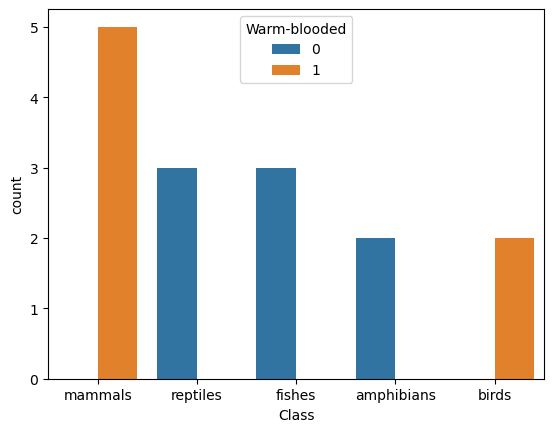

In [7]:
sns.countplot(x="Class",hue="Warm-blooded",data=data)
xlabel='Class'
ylabel='count'

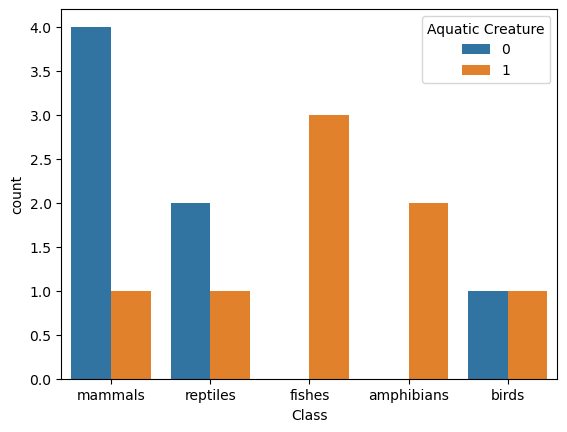

In [8]:
sns.countplot(x="Class",hue="Aquatic Creature",data=data)
xlabel='Class'
ylabel='count'

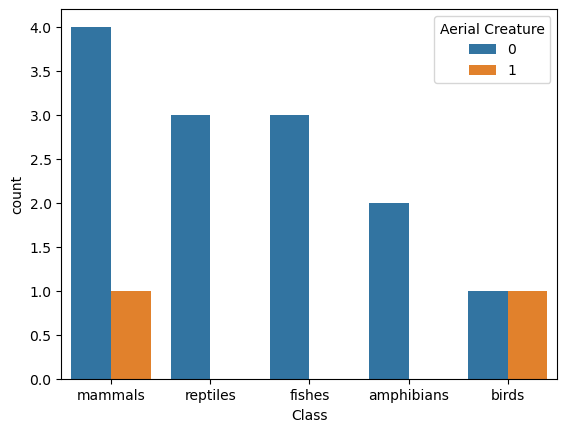

In [9]:
sns.countplot(x="Class",hue="Aerial Creature",data=data)
xlabel='Class'
ylabel='count'

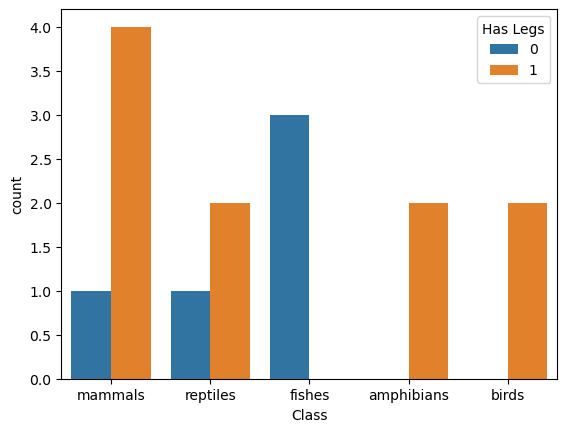

In [10]:
sns.countplot(x="Class",hue="Has Legs",data=data)
xlabel='Class'
ylabel='count'

In [11]:
X=data.drop(["Class"],axis=1)
X

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,1,1,0,0,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,1,1,1,0,0,0
4,0,0,1,0,1,1
5,0,0,0,0,1,0
6,1,1,0,1,1,1
7,1,0,0,1,1,0
8,1,1,0,0,1,0
9,0,1,1,0,0,0


In [12]:
Y=data["Class"]
Y

0        mammals
1       reptiles
2         fishes
3        mammals
4     amphibians
5       reptiles
6        mammals
7          birds
8        mammals
9         fishes
10      reptiles
11         birds
12       mammals
13        fishes
14    amphibians
Name: Class, dtype: object

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
model=DecisionTreeClassifier()

In [17]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [18]:
y_predict = model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy =accuracy_score(Y_test,y_predict)*100

In [21]:
accuracy

100.0

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
performance = confusion_matrix(Y_test,y_predict)

In [24]:
performance

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=int64)

In [25]:
from sklearn.metrics import plot_confusion_matrix

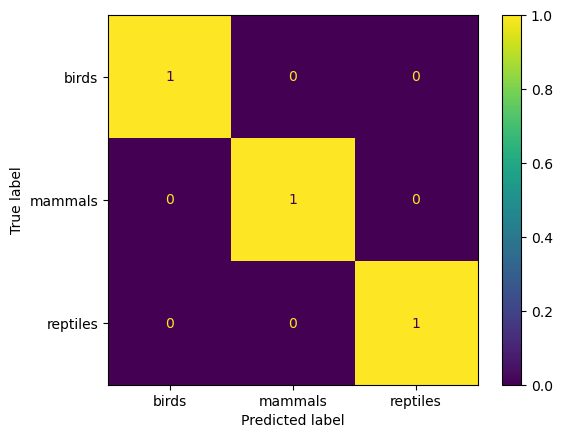

In [26]:
plot_confusion_matrix(model,X_test,Y_test)
plt.show()

In [27]:
from sklearn.metrics import classification_report

In [28]:
report =classification_report(Y_test,y_predict)

In [29]:
print(report)

              precision    recall  f1-score   support

       birds       1.00      1.00      1.00         1
     mammals       1.00      1.00      1.00         1
    reptiles       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [30]:
data

,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,1,1,0,0,1,0,mammals
1,0,0,0,0,0,1,reptiles
2,0,0,1,0,0,0,fishes
3,1,1,1,0,0,0,mammals
4,0,0,1,0,1,1,amphibians
5,0,0,0,0,1,0,reptiles
6,1,1,0,1,1,1,mammals
7,1,0,0,1,1,0,birds
8,1,1,0,0,1,0,mammals
9,0,1,1,0,0,0,fishes


In [31]:
from sklearn import tree

In [32]:
f= ['Warm-blooded','Gives Birth' ,'Aquatic Creature','Aerial Creature','Has Legs','Hibernates']

In [33]:
c=['mammals','reptiles','fishes','amphibians','birds']

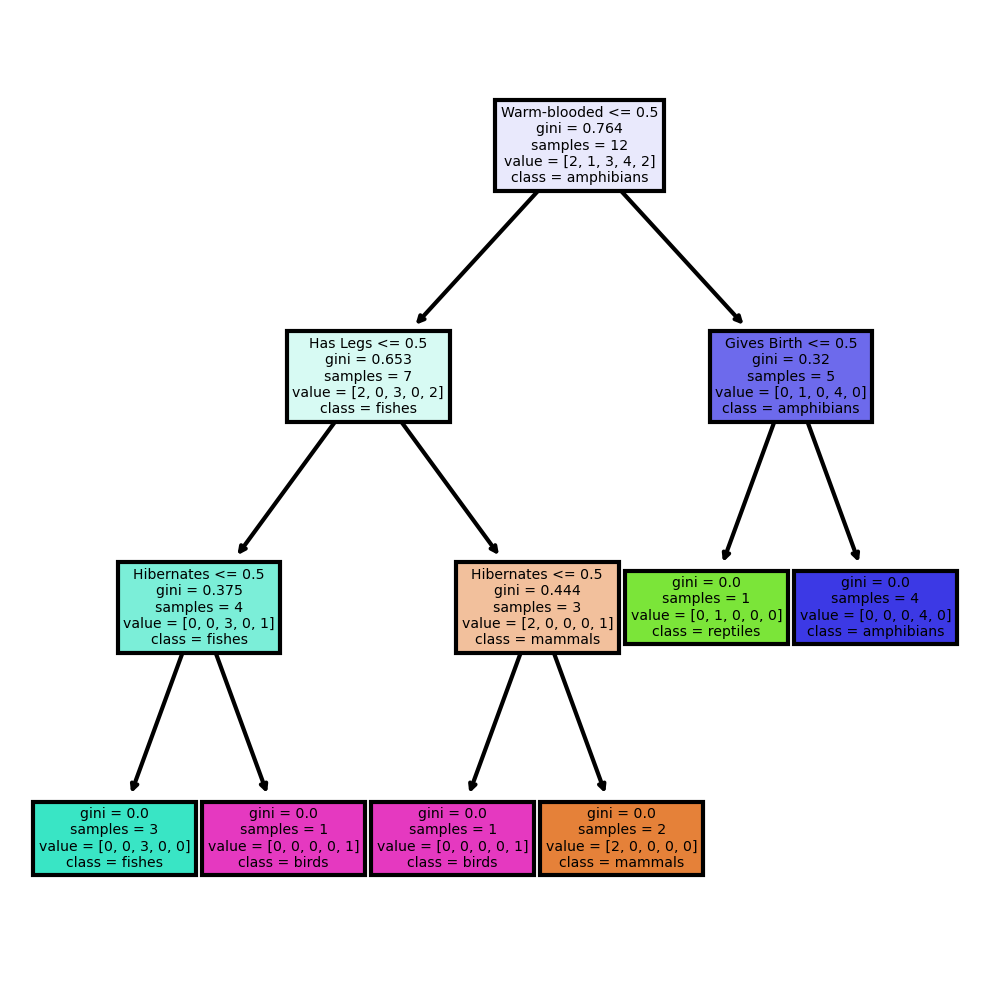

In [34]:
fig,ax =plt.subplots(nrows=1, ncols=1, figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=f,class_names=c,filled=True)
fig.savefig('decision.png')
plt.show()

In [35]:
model1=DecisionTreeClassifier(criterion='entropy')

In [36]:
model1.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

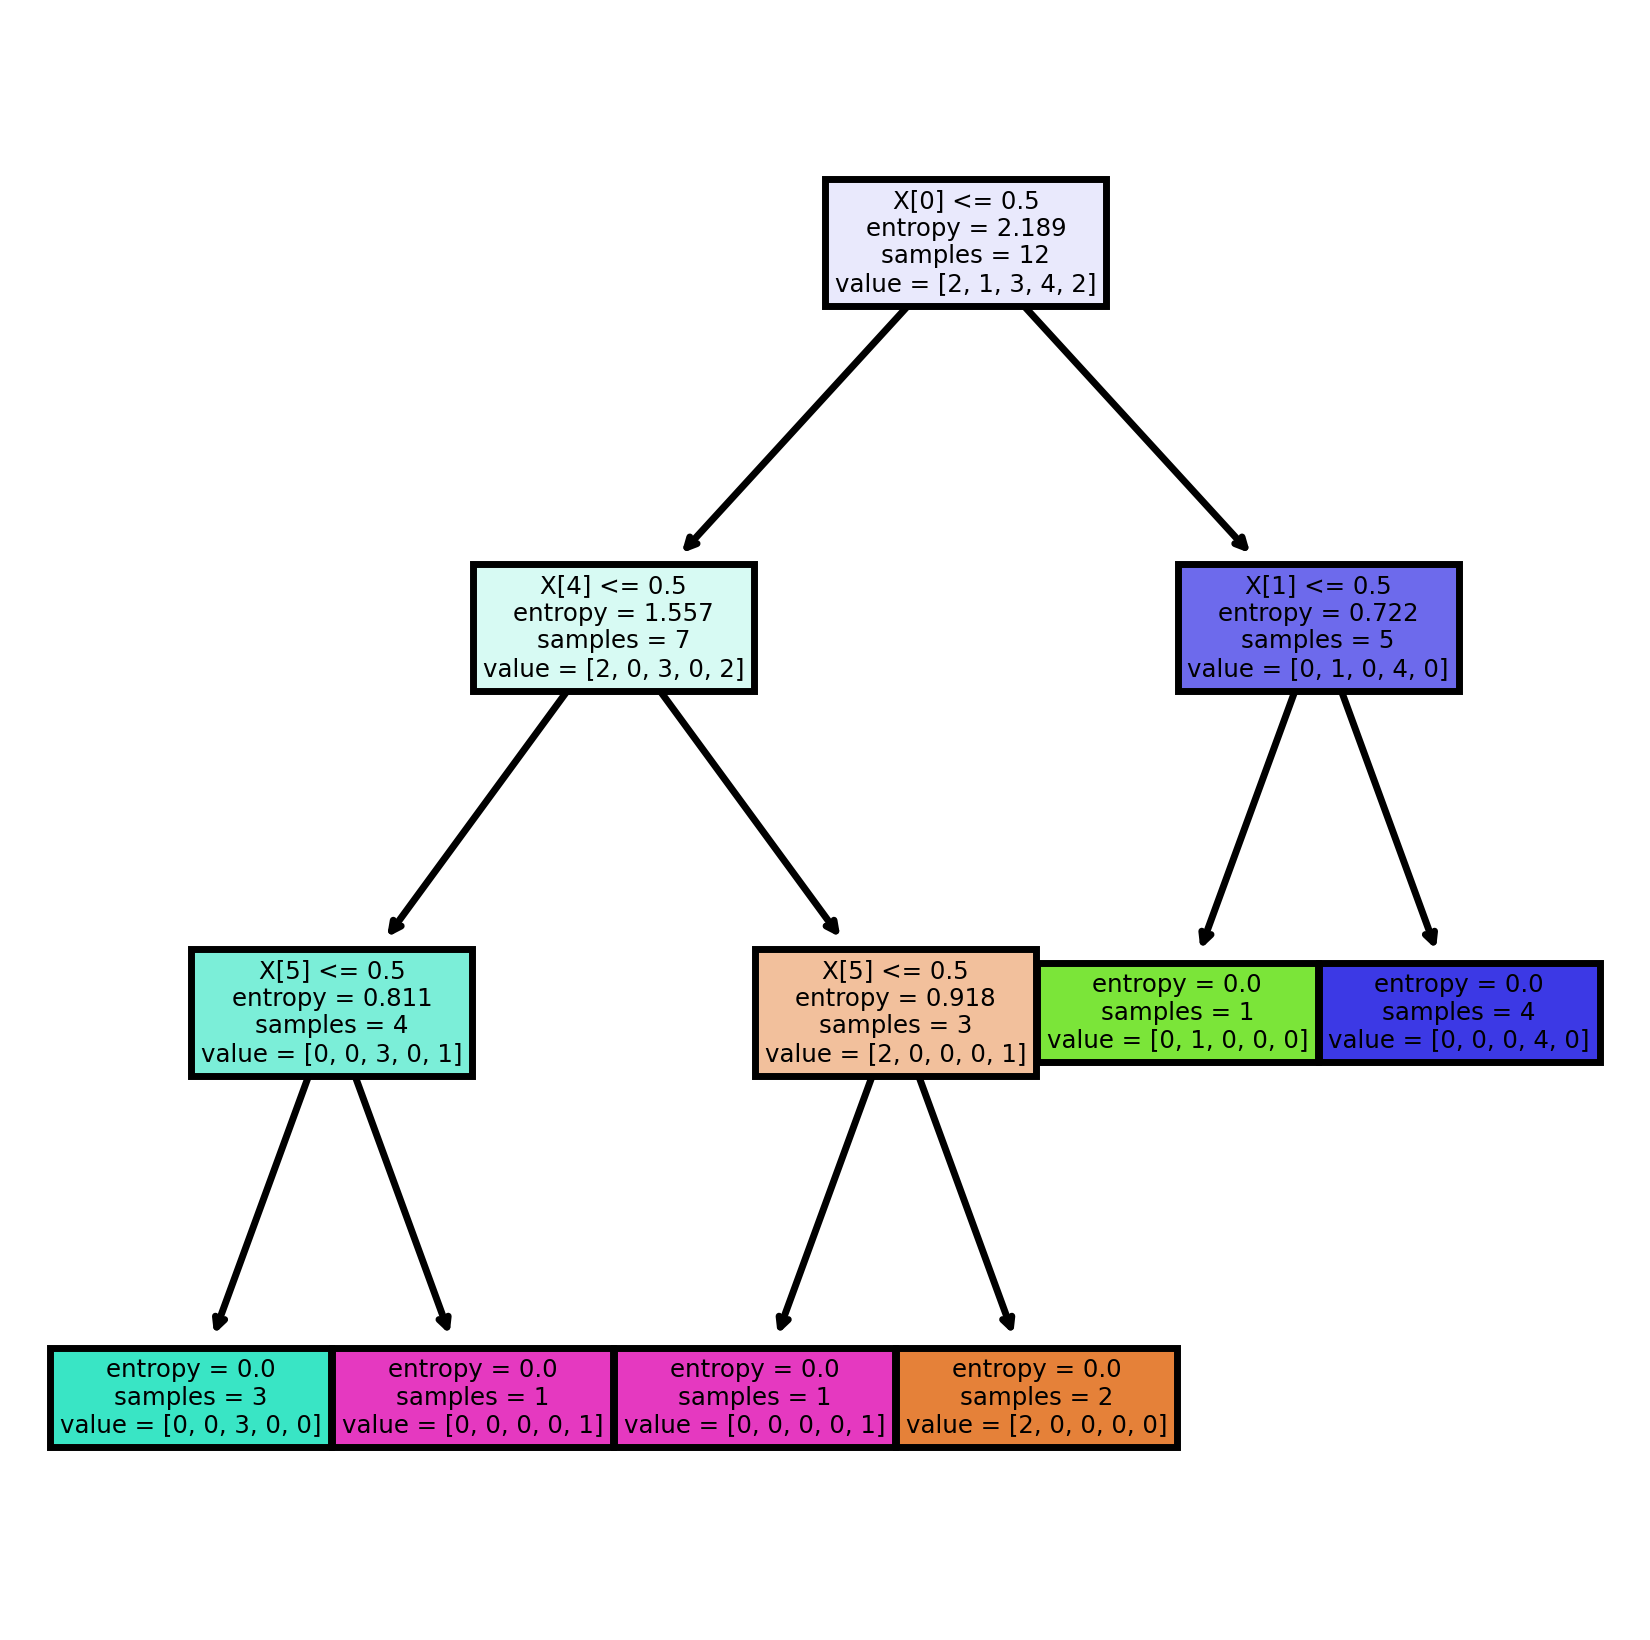

In [37]:
fig,ax =plt.subplots(nrows=1, ncols=1, figsize=(4,4),dpi=500)
#plt.figure(figsize=(15,10))
tree.plot_tree(model1,filled=True)
plt.show()